# Numbeo Quality of Life Index by Country 2015-2024 Years

### Исследовательский анализ данных

### Оглавление

# Часть 0: Введение

### Обзор

Источник данных: https://www.numbeo.com/cost-of-living/rankings_by_country.jsp

Набор данных, который мы видим здесь, содержит 10 таблиц по 11 столбцов об индексах качества жизни по странам за 2015-2024 гг. Суммарно набор содержит 758 записей.

Индекс качества жизни от Numbeo представляет собой популярный показатель качества жизни в городе и стране. Он рассчитывается на основе данных опросов пользователей сайта Numbeo. Чем выше индекс, тем лучше качество жизни.

Индекс рассчитывается с использованием эмпирической формулы, которая присваивает веса каждому фактору в зависимости от его важности. Текущая формула (написанная на языке программирования Java):

index.main = Math.max(0, 100 + purchasingPowerInclRentIndex / 2.5 - (housePriceToIncomeRatio * 1.0) - costOfLivingIndex / 10 + safetyIndex / 2.0 + healthIndex / 2.5 - trafficTimeIndex / 2.0 - pollutionIndex * 2.0 / 3.0 + climateIndex / 3.0);


**Метаданные:**
    
 **Quality of Life Index** - Индекс качества жизни (чем выше, тем лучше) представляет собой оценку общего качества жизни с использованием эмпирической формулы, учитывающей следующие факторы:
 
* **Purchasing Power Index** - Индекс покупательной способности на основе средней чистой зарплаты (чем выше, тем лучше);

* **Safety Index** - Индекс безопасности (чем выше, тем лучше). Рассчитывается на основе данных, предоставленных пользователями сайта Numbeo;

* **Health Care Index** - Индекс здравоохранения (чем выше, тем лучше). Он обеспечивает оценку инфраструктуры здравоохранения, услуг и ресурсов, доступных в конкретном месте. Расчет производится на основе опросов, проведенных посетителями сайта Numbeo за последние 36 месяцев;

* **Cost of Living Index** - Индекс стоимости жизни (чем ниже, тем лучше) - указывает относительные цены на потребительские товары, такие как продукты питания, рестораны, транспорт и коммунальные услуги;

* **Property Price to Income Ratio** - Соотношение цены недвижимости к доходу (чем ниже, тем лучше) - показатель доступности покупки квартиры;

* **Traffic Commute Time Index** - Индекс времени в пути (чем ниже, тем лучше) - это комплексный показатель, который учитывает такие факторы, как время в пути, неудовлетворенность временем, проведенным в пробке, выбросы CO 2 и общую неэффективность системы дорожного движения. Основан на данных, предоставленных пользователями;

* **Pollution Index** - Индекс загрязнения (чем ниже, тем лучше) - показатель, который учитывает такие факторы, как загрязнение воздуха и воды, вывоз мусора, чистота, шумовое и световое загрязнение, зеленые насаждения и комфорт по отношению к загрязнению. Numbeo придает наибольший вес загрязнению воздуха, затем загрязнению воды. Данные получены на основе опросов посетителей сайта Numbeo за последние 36 месяцев;

* **Climate Index** - Климатический индекс (чем выше, тем лучше) - это оценка привлекательности климата для данного города или страны. В городах с климатическим индексом 100 наблюдаются умеренные температуры и низкая влажность, а также отсутствуют другие серьезные неблагоприятные погодные условия.

Подробную информацию о расчете каждого из этих индексов можно найти на соответствующих страницах по ссылке: https://www.numbeo.com/quality-of-life/indices_explained.jsp.

### Вопросы:
   
1. Проанализировать центральные метрики и метрики вариативности данных;
2. Какие страны лучшие по версии Numbeo.com в целом за период 2015-2024 гг.


# [Часть 1: Импорт, загрузка данных](#Часть_1:_Импорт,_загрузка_данных)
* ### Импорт библиотек
* ### Установка первичных параметров
* ### Чтение данных с '.xlsx' файлов


# [Часть 2: Исследовательский анализ данных](#Часть_2:_Исследовательский_анализ_данных.)

* ### Информация, заголовки
* ### Подготовка данных
* ### Сравнение статистических показателей индекса качества жизни по странам
* ### Сравнение статистических показателей индекса качества жизни по годам за период 2015-2024 гг.
* ### Вычисление метрик вариативности данных


# [Выводы](#Выводы.)

# Часть 1: Импорт, загрузка данных<a id='Часть_1:_Импорт,_загрузка_данных'></a> 

* ### Импорт библиотек

In [1]:
#импорт стандартных библиотек
import glob
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import statistics
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

* ### Установка первичных параметров

In [2]:
#количество выводимых строк и столбцов (по умолчанию 20 столбцов и 60 строк)
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)

#количество знаков после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

* ### Чтение данных с '.xlsx' файлов

In [3]:
#определяем список всех файлов, соответствующих заданному шаблону
path = 'C:/Users/User/Desktop/Projects/Index_of_life'
filenames = glob.glob(path + "/*.xlsx")


#Создаем пустой словарь dfs, в который будут добавляться DataFrame’ы, полученные в результате чтения каждого из xlsx-файлов.
dfs = dict()
year = 2015

#с помощью цикла for проходим по всем именам файлов из списка filenames
for filename in filenames:
    #читаем содержимое каждого файла и добавляем полученный DataFrame в переменную name 
    name = pd.read_excel(filename)
    #обозначаем название ключа(df + год) и добавляем переменную name в значение словаря 
    dfs['%s' % year] = name
    year = year + 1

# Часть 2: Исследовательский анализ данных<a id='Часть_2:_Исследовательский_анализ_данных.'></a> 

## Информация, заголовки

* ### Информация

In [4]:
#вместо "2024" впишите год, по которосу нужно показать инфомацию о таблице за соответствующий год и запустите ячейку
year = 2024 
dfs[f'{year}'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            0 non-null      float64
 1   Country                         84 non-null     object 
 2   Quality of Life Index           84 non-null     float64
 3   Purchasing Power Index          84 non-null     float64
 4   Safety Index                    84 non-null     float64
 5   Health Care Index               84 non-null     float64
 6   Cost of Living Index            84 non-null     float64
 7   Property Price to Income Ratio  84 non-null     float64
 8   Traffic Commute Time Index      84 non-null     float64
 9   Pollution Index                 84 non-null     float64
 10  Climate Index                   84 non-null     float64
dtypes: float64(10), object(1)
memory usage: 7.3+ KB


Например, в таблица за 2024 год имеет 11 столбцов и 84 строки(стран) двух типов данных. 

В столбце 'Rank' - значения отсутствуют.

В остальных столбцах пропущенных значений нет.

In [17]:
# info по всем годам поочередно
for year in dfs:
    print(year)
    print()
    print(dfs[f'{year}'].info())
    print()
    print()

2015

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            0 non-null      float64
 1   Country                         86 non-null     object 
 2   Quality of Life Index           86 non-null     float64
 3   Purchasing Power Index          86 non-null     float64
 4   Safety Index                    86 non-null     float64
 5   Health Care Index               86 non-null     float64
 6   Cost of Living Index            86 non-null     float64
 7   Property Price to Income Ratio  86 non-null     float64
 8   Traffic Commute Time Index      86 non-null     float64
 9   Pollution Index                 86 non-null     float64
 10  Climate Index                   86 non-null     object 
dtypes: float64(9), object(2)
memory usage: 7.5+ KB
None


2016

<class 'pandas.core.frame.DataFra

In [18]:
#вычисление суммарного количества записей
summa = 0
for key in dfs:
    summa = summa + len(dfs[key])    
print(f"Суммарно набор содержит {summa} записей")

Суммарно набор содержит 758 записей


* ### Заголовки

In [5]:
# предварительный просмотр первых 5 строк загруженных данных.
# для примера взят 2024 год
year = 2024
dfs[f'{year}'].head(5)


,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,NaN,Luxembourg,207.70,149.40,65.50,76.40,65.50,9.10,25.60,21.80,82.60
1,NaN,Netherlands,199.70,105.30,73.80,79.20,64.70,7.20,23.70,21.70,87.00
2,NaN,Iceland,195.00,109.60,74.50,67.30,86.60,5.70,22.10,15.80,68.80
3,NaN,Denmark,193.80,104.10,73.80,78.00,76.00,6.80,28.80,21.90,82.50
4,NaN,Finland,190.80,98.30,73.60,77.30,66.20,8.20,26.00,12.00,58.90


In [4]:
# предварительный просмотр последних 5 строк загруженных данных
# для примера взят 2024 год
year = 2024
dfs[f'{year}'].tail(5)

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
79,NaN,Iran,78.80,22.00,50.50,53.00,27.00,21.60,46.80,74.90,63.40
80,NaN,Venezuela,77.20,12.70,18.70,38.70,39.40,15.40,32.80,75.50,99.90
81,NaN,Sri Lanka,77.10,14.60,57.90,71.00,32.30,35.70,54.80,59.20,59.10
82,NaN,Bangladesh,69.30,26.10,38.50,42.20,24.80,12.60,57.70,85.60,71.30
83,NaN,Nigeria,48.00,9.80,33.90,48.70,19.00,21.20,61.70,87.90,60.80


## Подготовка данных

* ### Формирование таблицы стран с индексами качества жизни за 10 лет

In [4]:
#список стран взят с сайта numbeo.com
numbeo_country_list = ['Afghanistan',
                    'Aland Islands',
                    'Albania',
                    'Alderney',
                    'Algeria',
                    'American Samoa',
                    'Andorra',
                    'Angola',
                    'Anguilla',
                    'Antigua And Barbuda',
                    'Argentina',
                    'Armenia',
                    'Aruba',
                    'Australia',
                    'Austria',
                    'Azerbaijan',
                    'Bahamas',
                    'Bahrain',
                    'Bangladesh',
                    'Barbados',
                    'Belarus',
                    'Belgium',
                    'Belize',
                    'Benin',
                    'Bermuda',
                    'Bhutan',
                    'Bolivia',
                    'Bonaire',
                    'Bosnia And Herzegovina',
                    'Botswana',
                    'Brazil',
                    'British Virgin Islands',
                    'Brunei',
                    'Bulgaria',
                    'Burkina Faso',
                    'Burundi',
                    'Cambodia',
                    'Cameroon',
                    'Canada',
                    'Cape Verde',
                    'Cayman Islands',
                    'Central African Republic',
                    'Chad',
                    'Chile',
                    'China',
                    'Colombia',
                    'Comoros',
                    'Congo',
                    'Cook Islands',
                    'Costa Rica',
                    'Croatia',
                    'Cuba',
                    'Curacao',
                    'Cyprus',
                    'Czech Republic',
                    'Denmark',
                    'Djibouti',
                    'Dominica',
                    'Dominican Republic',
                    'Ecuador',
                    'Egypt',
                    'El Salvador',
                    'Equatorial Guinea',
                    'Eritrea',
                    'Estonia',
                    'Ethiopia',
                    'Falkland Islands',
                    'Faroe Islands',
                    'Fiji',
                    'Finland',
                    'France',
                    'French Guiana',
                    'French Polynesia',
                    'French Southern Territories',
                    'Gabon',
                    'Gambia',
                    'Georgia',
                    'Germany',
                    'Ghana',
                    'Gibraltar',
                    'Greece',
                    'Greenland',
                    'Grenada',
                    'Guadeloupe',
                    'Guam',
                    'Guatemala',
                    'Guernsey',
                    'Guinea',
                    'Guinea-Bissau',
                    'Guyana',
                    'Haiti',
                    'Honduras',
                    'Hong Kong',
                    'Hungary',
                    'Iceland',
                    'India',
                    'Indonesia',
                    'Iran',
                    'Iraq',
                    'Ireland',
                    'Isle Of Man',
                    'Israel',
                    'Italy',
                    'Ivory Coast',
                    'Jamaica',
                    'Japan',
                    'Jersey',
                    'Jordan',
                    'Kazakhstan',
                    'Kenya',
                    'Kosovo (Disputed Territory)',
                    'Kuwait',
                    'Kyrgyzstan',
                    'Laos',
                    'Latvia',
                    'Lebanon',
                    'Lesotho',
                    'Liberia',
                    'Libya',
                    'Liechtenstein',
                    'Lithuania',
                    'Luxembourg',
                    'Macao',
                    'Madagascar',
                    'Malawi',
                    'Malaysia',
                    'Maldives',
                    'Mali',
                    'Malta',
                    'Marshall Islands',
                    'Martinique',
                    'Mauritania',
                    'Mauritius',
                    'Mexico',
                    'Micronesia',
                    'Moldova',
                    'Monaco',
                    'Mongolia',
                    'Montenegro',
                    'Montserrat',
                    'Morocco',
                    'Mozambique',
                    'Myanmar',
                    'Namibia',
                    'Nauru',
                    'Nepal',
                    'Netherlands',
                    'New Caledonia',
                    'New Zealand',
                    'Nicaragua',
                    'Niger',
                    'Nigeria',
                    'Norfolk Island',
                    'North Korea',
                    'North Macedonia',
                    'Northern Mariana Islands',
                    'Norway',
                    'Oman',
                    'Pakistan',
                    'Palau',
                    'Palestine',
                    'Panama',
                    'Papua New Guinea',
                    'Paraguay',
                    'Peru',
                    'Philippines',
                    'Poland',
                    'Portugal',
                    'Puerto Rico',
                    'Qatar',
                    'Republic Of Congo',
                    'Reunion',
                    'Romania',
                    'Russia',
                    'Rwanda',
                    'Saint Helena',
                    'Saint Kitts And Nevis',
                    'Saint Lucia',
                    'Saint Vincent And The Grenadines',
                    'Samoa',
                    'San Marino',
                    'Sao Tome And Principe',
                    'Saudi Arabia',
                    'Senegal',
                    'Serbia',
                    'Seychelles',
                    'Sierra Leone',
                    'Singapore',
                    'Sint Maarten',
                    'Slovakia',
                    'Slovenia',
                    'Solomon Islands',
                    'Somalia',
                    'South Africa',
                    'South Korea',
                    'South Sudan',
                    'Spain',
                    'Sri Lanka',
                    'Sudan',
                    'Suriname',
                    'Swaziland',
                    'Sweden',
                    'Switzerland',
                    'Syria',
                    'Taiwan',
                    'Tajikistan',
                    'Tanzania',
                    'Thailand',
                    'Timor-Leste',
                    'Togo',
                    'Tonga',
                    'Trinidad And Tobago',
                    'Tunisia',
                    'Turkey',
                    'Turkmenistan',
                    'Turks And Caicos Islands',
                    'Tuvalu',
                    'Uganda',
                    'Ukraine',
                    'United Arab Emirates',
                    'United Kingdom',
                    'United States',
                    'Uruguay',
                    'Us Virgin Islands',
                    'Uzbekistan',
                    'Vanuatu',
                    'Vatican City',
                    'Venezuela',
                    'Vietnam',
                    'Western Sahara',
                    'Yemen',
                    'Zambia',
                    'Zimbabwe']
print(f'Количество стран, загруженных с сайта Numbeo - {len(numbeo_country_list)}')



Количество стран, загруженных с сайта Numbeo - 233


In [5]:
#создание таблицы стран с индексами качества жизни по каждому году:

#создаем датафрейм из общего списка стран numbeo_country_list:
data = pd.DataFrame(numbeo_country_list, columns=['Country'])

for key in reversed(dfs):
    
    #из загруженных данных достаем столбец с названием страны и столбец с индексом качества жизни:
    
    year = dfs[key]
    countries = year['Country']
    indices = year['Quality of Life Index']
    
    #создаем из этих столбцов отдельных датафрейм
    df = pd.DataFrame(countries)
    df[f'{key}'] = indices
    
    #объединяем полученные датафреймы
    right = df
    left = data
    data = right.merge(left, on='Country', how='right')

In [7]:
#удаление пустых строк по условию
cols = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
data['sum'] = data[cols]. sum (axis= 1 )
data = data[data['sum'] != 0]
data.drop('sum', axis= 1 , inplace= True )

#переиндексация, старый индекс сбрасываем
data = data.reset_index(drop=True)
data.head()

,Country,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Argentina,77.00,138.50,139.60,131.80,122.50,115.30,110.50,105.40,111.00,112.00
1,Armenia,49.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,180.80,198.80,176.50,188.70,191.10,186.20,181.50,183.80,183.00,160.90
3,Austria,182.60,192.40,190.40,190.20,191.10,182.50,182.40,179.20,185.80,181.30
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,102.90,104.10,109.60,109.60


* ### Индекс жизни в определенной стране за 10 лет

In [21]:
#индекс жизни в определенной стране за 10 лет
#взята Канада для примера
country = 'Canada'
data[data['Country'] == country]


,Country,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
14,Canada,177.60,177.20,167.20,173.90,170.30,163.50,160.00,160.40,162.30,149.60


In [33]:
#если выбранная страна в наборе данных отсутствует, покажет нулевой результат:
country = 'Cada'
data[data['Country'] == country]

,Country,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024


## Сравнение статистических показателей индекса качества жизни по странам

* ### Вычисление центральных метрик

Ниже расчет среднего арифметического:

In [8]:
#Вычисление среднего значения индекса по каждой стране:
data['Среднее'] = np.mean(data[cols], axis= 1)

Средневзвешенное является обобщением среднего арифметического, которое позволяет вам определить относительный вклад каждой точки данных в результат.

In [9]:
#Вычисление средневзвешенного значения индекса по каждой стране:
data['Средневзвешенное'] = np.average(data[cols], axis= 1)

Медиана — это средний элемент отсортированного набора данных. Расчет медианы представлен внизу:

In [10]:
#вычисление медианного значения индекса по каждой стране:
data['Медиана'] = np.median(data[cols], axis= 1)

* ### Вычисление метрик вариативности данных

Далее, вычислим метрики оценки вариативности данных. Первый показатель - дисперсия. Она показывает разброс данных, то есть как далеко точки данных от среднего значения.

In [11]:
data['Дисперсия'] = np.var(data[cols], axis=1)

Далее было рассчитано среднеквадратичное отклонение. Оно связано с оценкой дисперсией, поскольку стандартное отклонение есть положительным квадратный корень из оценки дисперсии. Стандартное отклонение часто более удобно, чем дисперсия, потому что имеет ту же размерность, что и данные. Сам расчет:

In [12]:
data['Стандартное отклонение'] = np.std(data[cols], axis=1)

* ### Вывод метрик индекса качества жизни в выбранной стране за период 2015-2024 гг.

In [13]:
#индекс качества жизни в выбранной стране за 10 лет
#взята Канада для примера
country = 'Canada'
data[['Country', 'Среднее', 'Средневзвешенное', 'Медиана', 'Дисперсия', 'Стандартное отклонение']][data['Country'] == country]


,Country,Среднее,Средневзвешенное,Медиана,Дисперсия,Стандартное отклонение
14,Canada,166.20,166.20,165.35,69.82,8.36


* ### Вывод рассчитанных метрик по всем странам

Подсветим в каждой строке минимум красным цветом и максимум зеленым цветом и выведем датафрейм, начиная с максимального среднего значения индекса качества жизни

In [14]:
#выбор количества стран, которые будут показаны в таблице, начиная с максимального среднего значения индекса качества жизни
#для примера взято 15 стран
counts = 10

#сортировка датафрейма по среднему значению
data.sort_values('Среднее', ascending=False, inplace=True)

#переиндексация, старый индекс сбрасываем
data = data.reset_index(drop=True)

#подсветка в каждой строке минимума красным цветом и максимума зеленым цветом
(data.head(counts)
 .style
 .highlight_max(color='GreenYellow', subset=cols, axis= 1)
 .highlight_min(color='LightCoral', subset=cols, axis= 1)
 
 #подсветка в столбцах дисперсии и стандартного отклонения минимума красным цветом и максимума зеленым цветом
 .highlight_max(color='Lime', subset=['Дисперсия','Стандартное отклонение'])
 .highlight_min(color='IndianRed', subset=['Дисперсия','Стандартное отклонение'])
)

,Country,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Среднее,Средневзвешенное,Медиана,Дисперсия,Стандартное отклонение
0,Switzerland,222.900000,208.500000,173.500000,190.800000,195.900000,192.000000,190.800000,195.300000,193.600000,185.300000,194.860000,194.860000,192.800000,156.394400,12.505775
1,Denmark,190.200000,206.500000,184.900000,197.700000,198.600000,192.700000,190.000000,192.400000,194.700000,193.800000,194.150000,194.150000,193.250000,30.890500,5.557922
2,Luxembourg,nan,nan,nan,nan,nan,nan,nan,173.600000,192.900000,207.700000,191.400000,nan,nan,194.926667,13.961614
3,Finland,190.200000,184.000000,182.900000,195.300000,194.000000,190.200000,182.800000,185.000000,190.500000,190.800000,188.570000,188.570000,190.200000,18.786100,4.334293
4,Netherlands,166.800000,192.400000,175.200000,191.300000,188.900000,183.700000,183.300000,185.400000,196.700000,199.700000,186.340000,186.340000,187.150000,87.670400,9.363247
5,Austria,182.600000,192.400000,190.400000,190.200000,191.100000,182.500000,182.400000,179.200000,185.800000,181.300000,185.790000,185.790000,184.200000,20.866900,4.568030
6,Iceland,nan,nan,nan,nan,187.800000,181.700000,179.100000,182.300000,187.500000,195.000000,185.566667,nan,nan,27.525556,5.246480
7,Germany,195.900000,199.700000,189.700000,190.000000,187.000000,179.800000,176.800000,180.300000,179.000000,176.100000,185.430000,185.430000,183.650000,61.572100,7.846789
8,Australia,180.800000,198.800000,176.500000,188.700000,191.100000,186.200000,181.500000,183.800000,183.000000,160.900000,183.130000,183.130000,183.400000,89.620100,9.466789
9,New Zealand,175.500000,201.100000,184.700000,182.400000,185.600000,181.000000,175.800000,176.800000,176.700000,162.300000,180.190000,180.190000,178.900000,87.736900,9.366798


По среднему значению за период 2015-2024 лидерами индекса качества жизни являются Швейцария, Дания, Люксембург, Финляндия, Нидерланды.

* ### График индекса качества жизни по странам за выбранный год

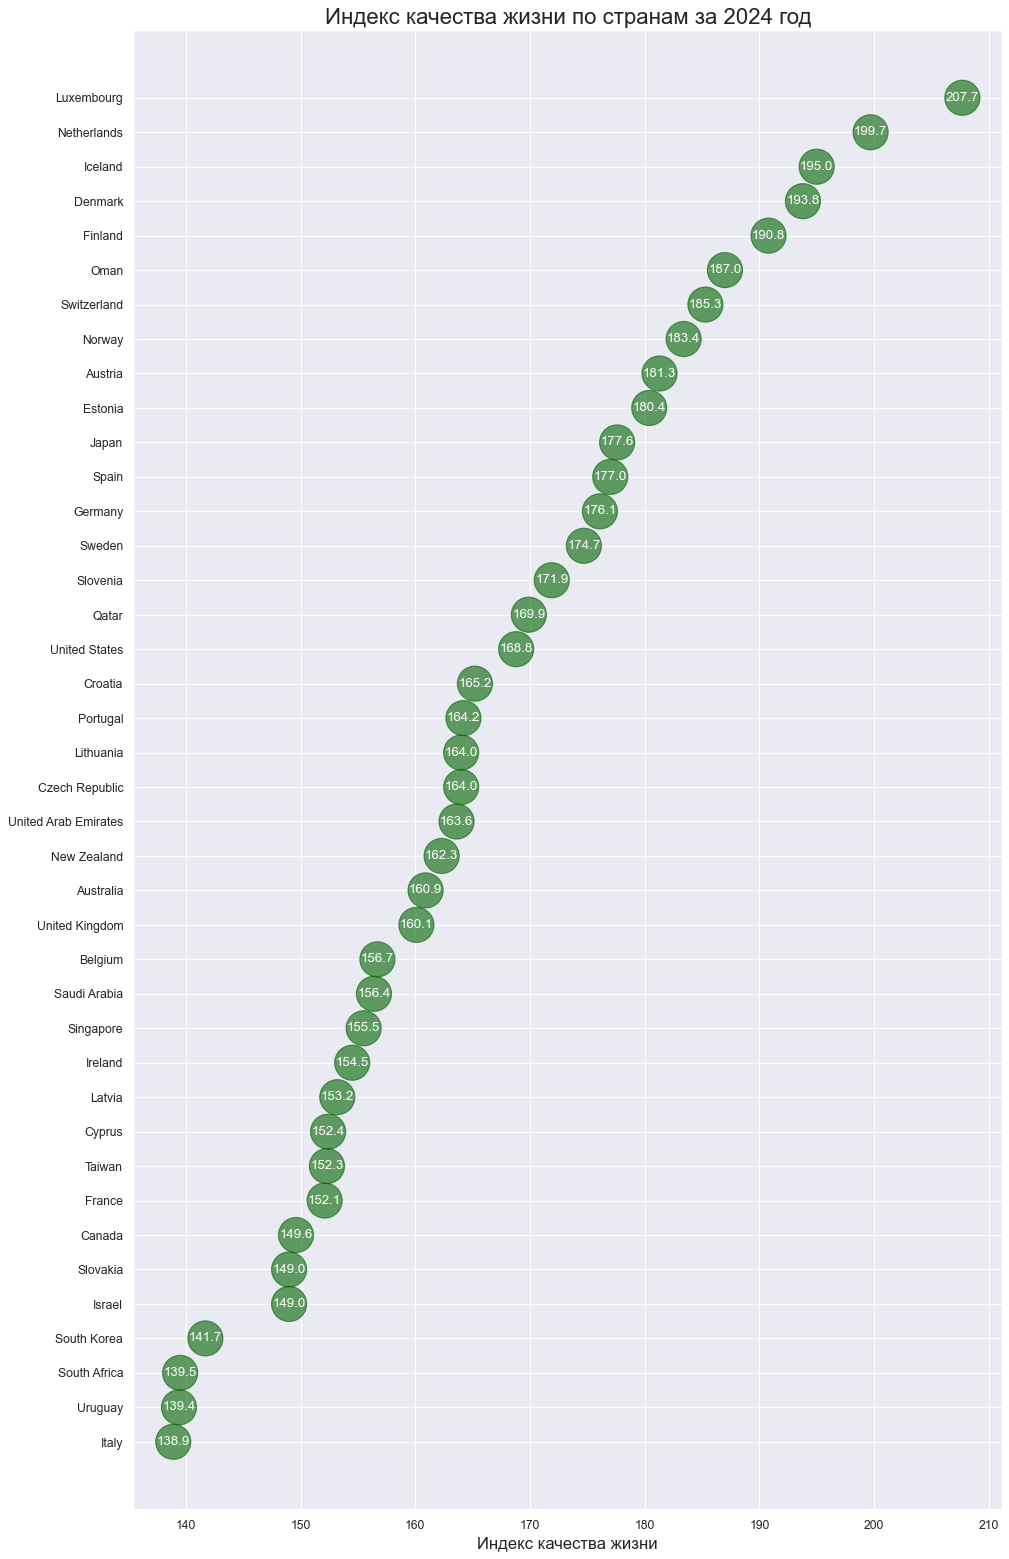

In [20]:
#выбор года, для примера стоит 2024 год:
year = '2024'

#выбор, количества стран, которые будут отображены на графике, начиная с максимального индекса
#для примера стоит 40 стран
counts = 40

# подготовка данных
df = data
df = df[df[year] > -50]
df['colors'] = ['red' if x < df[year].mean() else 'darkgreen' for x in df[year]]
df.sort_values(year, ascending=True, inplace=True)
df = df.tail(counts)
df.reset_index(drop=True, inplace=True)

# отрисовка графика
plt.figure(figsize=(14,24), dpi= 80)
plt.scatter(df[year], df['Country'], s=1000, alpha=.6, color=df.colors)
for x, y, tex in zip(df[year], df.index, df[year]):
    t = plt.text(x, y, round(tex, 1), horizontalalignment='center', 
                 verticalalignment='center', fontdict={'color':'white'})

# осветление линий
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

#подписи осей
plt.title(f'Индекс качества жизни по странам за {year} год', fontdict={'size':20})
plt.xlabel('Индекс качества жизни', fontdict={'size':15})
plt.show()
df.drop('colors', axis= 1 , inplace= True )

## Сравнение статистических показателей индекса качества жизни по годам за период 2015-2024 гг.

* ### Сортировка значений индекса жизни за выбранный год

In [307]:
#выбор года
#для примера взят 2024 год
year = '2024'

#выбор количества стран, которые будут показаны в таблице, начиная с максимального среднего значения индекса качества жизни
#для примера взято 15 стран
counts = 10

#сортировка значений индекса жизни за выбранный год
data = data.sort_values(by=year, ascending=False)

#переиндексация, старый индекс сбрасываем
data = data.reset_index(drop=True)

#вывод
data[['Country', year, 'Среднее', 'Средневзвешенное', 'Медиана', 'Дисперсия', 'Стандартное отклонение']].head(counts)

,Country,2024,Среднее,Средневзвешенное,Медиана,Дисперсия,Стандартное отклонение
0,Luxembourg,207.70,191.40,NaN,NaN,194.93,13.96
1,Netherlands,199.70,186.34,186.34,187.15,87.67,9.36
2,Iceland,195.00,185.57,NaN,NaN,27.53,5.25
3,Denmark,193.80,194.15,194.15,193.25,30.89,5.56
4,Finland,190.80,188.57,188.57,190.20,18.79,4.33
5,Oman,187.00,176.92,NaN,NaN,58.43,7.64
6,Switzerland,185.30,194.86,194.86,192.80,156.39,12.51
7,Norway,183.40,177.94,177.94,176.35,37.27,6.10
8,Austria,181.30,185.79,185.79,184.20,20.87,4.57
9,Estonia,180.40,172.32,NaN,NaN,106.76,10.33


* ### Построение диаграммы "Ящик с усами" по статистическим данным индекса жизни по выбранному году

Text(0.5, 1.0, 'Параметры индекса качества жизни за 2024 год')

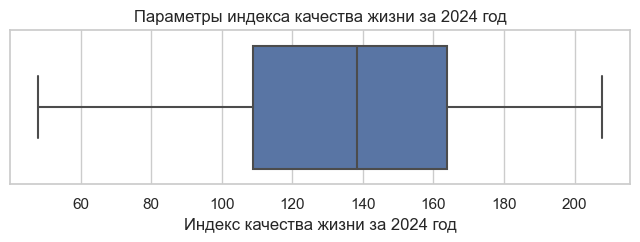

In [8]:
#можно выбрать любой год из периода 2015-2024 гг. для просмотра статистических данных
year = '2024'

#построение диаграммы "Ящик с усами" по данным индекса жизни за выбранный год
sns.set(style = 'whitegrid')
plt.figure(figsize = (8, 2))
sns.boxplot(x = data[year])
plt.xlabel(f'Индекс качества жизни за {year} год')
plt.title(f'Параметры индекса качества жизни за {year} год')

In [9]:
#статистические показатели распределения данных индекса жизни за выбранный год
print(f'Статистические показатели за {year} год')
data[year].describe()

Статистические показатели за 2024 год


count    83.00
mean    135.58
std      35.55
min      48.00
25%     108.85
50%     138.40
75%     163.80
max     207.70
Name: 2024, dtype: float64

Структура диаграммы "Ящик с усами"
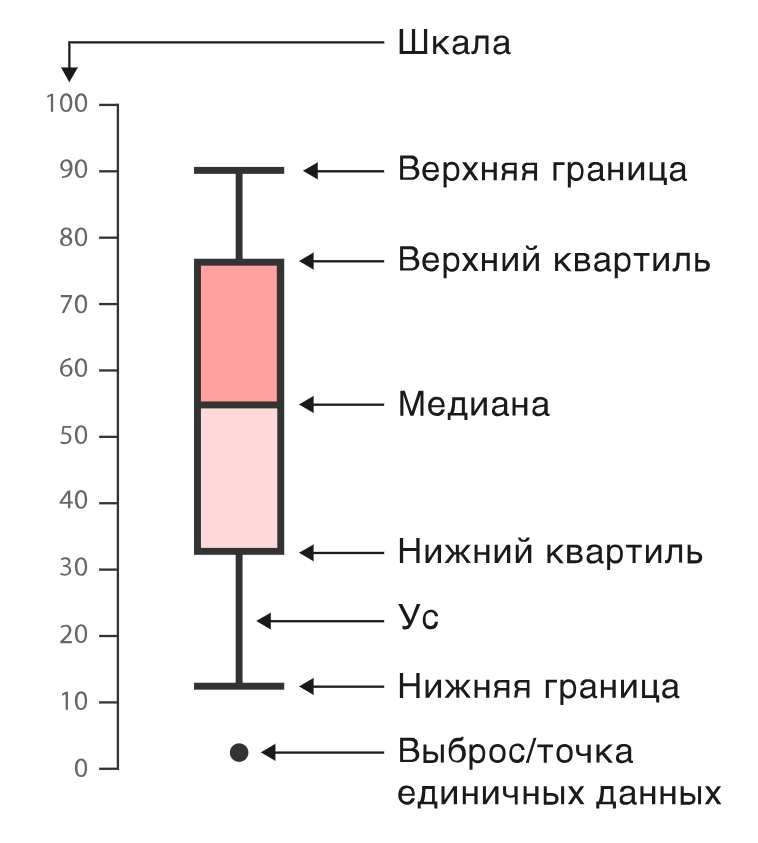

* ### Построение диаграммы "Ящик с усами" по статистическим данным индекса жизни за 2015-2024 год

Text(0, 0.5, 'Годы')

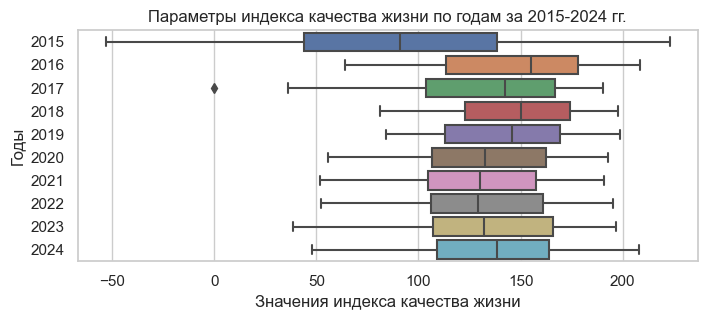

In [7]:
#преобразование DataFrame pandas в длинный формат:
df_melted = pd.melt(data[cols])

#создание коробочных диаграмм, используя seaborn:
sns.set(style = 'whitegrid')
plt.figure(figsize = (8, 3))
sns.boxplot(x='value', y='variable', data=df_melted)

#изменение подписей осей
plt.title('Параметры индекса качества жизни по годам за 2015-2024 гг.')
plt.xlabel('Значения индекса качества жизни')
plt.ylabel('Годы')

In [16]:
data.describe()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Среднее,Средневзвешенное,Медиана,Дисперсия,Стандартное отклонение
count,86.00,56.00,67.00,60.00,71.00,80.00,83.00,87.00,82.00,83.00,95.00,54.00,54.00,95.00,95.00
mean,91.48,146.84,134.32,145.97,142.31,134.10,130.80,132.12,135.17,135.58,122.70,139.69,142.24,273.93,13.59
std,62.88,40.61,41.83,32.13,32.93,33.92,33.34,34.11,36.35,35.55,46.80,35.02,32.41,372.14,9.50
min,-53.00,63.80,0.00,81.10,84.00,55.70,52.00,52.40,38.50,48.00,-35.70,73.09,76.45,0.00,0.00
25%,43.83,113.58,103.85,122.55,113.00,106.40,104.60,106.20,107.28,108.85,93.41,112.71,114.56,50.35,7.10
50%,90.90,155.15,142.50,150.05,145.70,132.75,130.00,129.20,132.25,138.40,122.80,141.36,144.22,156.39,12.51
75%,138.48,177.95,167.05,174.15,169.05,162.40,157.65,161.05,165.75,163.80,158.01,168.16,170.38,384.00,19.60
max,222.90,208.50,190.40,197.70,198.60,192.70,190.80,195.30,196.70,207.70,194.86,194.86,193.25,2792.25,52.84


По статистическим показателям индекса качаства жизни за период 2015-2022 гг. видим следующее.

* Коробчатая диаграмма за 2015 год сильно отличается от таких же диаграмм за следующие годы гораздо более широким диапазоном значений. Возможное объяснение этому - использовалась иная формула или другие веса для подсчета значения индекса жизни за 2015 год.


* Виден выброс в данных за 2017 год. Его значение равно нулю у страны Венесуэла. Возможно это связано с ошибкой в расчетах индекса.


* Медианное значение (50-й процентиль) в 2016-2019 гг сильнее отличаются от среднего, чем в другие годы. Разница между ними все же незначительна и составляет вплоть до 5-6%


* Наиболее распространенный индекс качества жизни (значения между процентилем 25 и процентилем
75, показанные прямоугольниками на диаграмме) примерно одинаков. Он составляет от 103.85 в 2017 году  до 177.95 в 2016 году. Исключение составляет 2015 год. Значение 25-ого процентиля по этому году составляет 43.83, а 75-го процентиля - 138.48. Это существенно ниже показателей остальных лет.

# Выводы<a id='Выводы.'></a>

1. Загружена информация об индексах Numbeo.com в разрезе стран за период 2015-2024 гг.
Итого набор содержит 10 таблиц и суммарно 758 записей.
2. Сформирована таблица по странам со сведенными данными индекса качества жизни за 2015-2024 гг.
3. Вычислены центральные метрики и метрики вариативности данных. 
4. Среднее, средневзвешенное и медианное значение по годам отличается в пределах 5-6%,
что говорит об однородности данных.
5. По среднему значению индека качества жизни за период 2015-2024 лучшими странами являются 
Швейцария, Дания, Люксембург, Финляндия, Нидерланды.
6. При сравнении данных по годам, выяснена неоднородность данных. У данных за 2015 год гораздо
более широкий размах, чем по другим годам. Также по этому году наиболее распространенные значения
индекса качества жизни значительно ниже чем по другим годам. Возможно при расчетах индексов
2015 года использовалась другая формула.